# Machine Vision
## Assignment 5 - Recognition

## Personal details

* **Name(s):** `PUT YOUR NAME(S) HERE.`
* **Student ID(s):** `PUT YOUR STUDENT ID(S) HERE.`

## Introduction

In this assignment, your goal is to classify apples and pears using shape and color features. The figure below shows examples from both classes. There is a slight color difference between the apples and pears. Therefore, we will use the hue of the fruit as our first feature $x_1$. Depending on the viewpoint, the apples are generally more round compared to pears. To represent the roundness, we will use the eccentricity as our second feature $x_2$. The eccentricity will vary between 0 and 1 (the eccentricity of a circe is zero). The features can be combined into a feature vector $\mathbf{x} = [x_1, x_2]^\top$.

![classes.png](attachment:classes.png)

We can utilize techniques from the previous assignments to compute features (such as the eccentricity and hue) from the images. However, this assignment focuses on the classification so the features and class labels have been precomputed and saved to `class_data.npz` file. Let's first read and visualize the samples.

**Note!** The package *scikit-learn* is needed. If you encounter an error, type `pip install -U scikit-learn` to the terminal.

[[23.05909256  0.50872999]
 [26.22227052  0.32685606]
 [23.50354033  0.5416599 ]
 [27.19005821  0.3446652 ]]
['pear' 'apple' 'pear' 'apple']


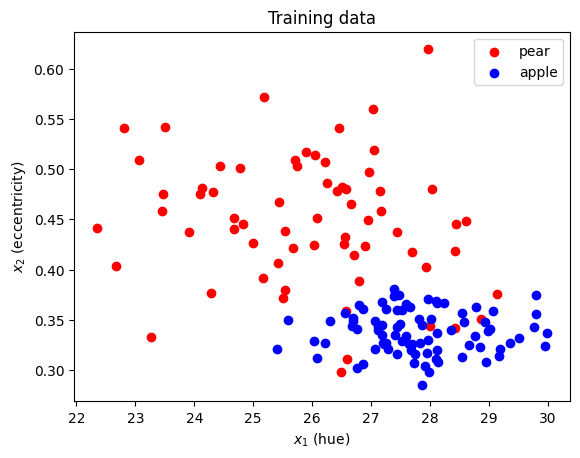

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import NearestCentroid

# Load data
data=np.load('class_data.npz')
X_train = data['arr_0'] # Nx2 matrix
y_train = data['arr_1'] # 1xN vector
X_test = data['arr_2']  # Mx2 matrix
y_test = data['arr_3']  # 1xM vector

# Print few feature vectors and
# corresponding true classes
print(X_train[:4,:])
print(y_train[:4])

# Visualize training data
yp = y_train == 'pear'
ya = y_train == 'apple'
X1 = X_train[yp,:]
X2 = X_train[ya,:]

fig, ax = plt.subplots()
ax.scatter(X1[:,0], X1[:,1], c='r', label='pear')
ax.scatter(X2[:,0], X2[:,1], c='b', label='apple')
ax.set_xlabel('$x_1$ (hue)')
ax.set_ylabel('$x_2$ (eccentricity)')
ax.set_title('Training data')
ax.legend()

## Task 1 - Nearest centroid classifier (0.5 points)

Complete the following code cell to classify the test samples using the __[`nearest centroid classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html)__.  See the example notebook __[`Recognition.ipynb`](https://github.com/jtheikkila/mvis/blob/master/jupyter/Recognition.ipynb)__ before continuing.

**Instructions**
1. Train the classifier using the training samples `X_train` and `y_train` with the `fit()` method. Use **Euclidean distance** as the distance metric.
2. Evaluate the performance of the classifier using the `score()` method on the independent test data `X_test` and true labels `y_test`
3. Print the mean accuracy of the classifier. Your code should be correct if the mean accuracy is 0.70.

In [12]:
# ---------- YOUR CODE STARTS HERE -----------
nc = NearestCentroid(metric='euclidean')
nc.fit(X_train, y_train)

perform_score = nc.score(X_test, y_test)
print(perform_score)

# ----------- YOUR CODE ENDS HERE ------------

0.7


In [ ]:
# LEAVE EMPTY

## Task 2 - Visualization (0.5 points)

Complete the following code cell to visualize the test data (`X_test`, `y_test`). Your plot should:
1. Display test samples (`X_test`, `y_test`) using different colors (same way we plotted the training data).
2. Display the **class centroids** and the **decision boundary** between the classes.

Refer to the sample code in __[`Recognition.ipynb`](https://github.com/jtheikkila/mvis/blob/master/jupyter/Recognition.ipynb)__ for guidance. It is optional to display the true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN) as in the sample code. Note that Euclidean distance does not work well in this case. Therefore, the decision boundary will appear as a vertical line.

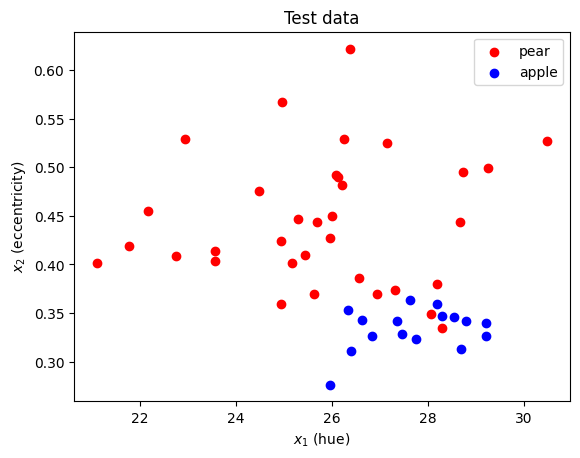

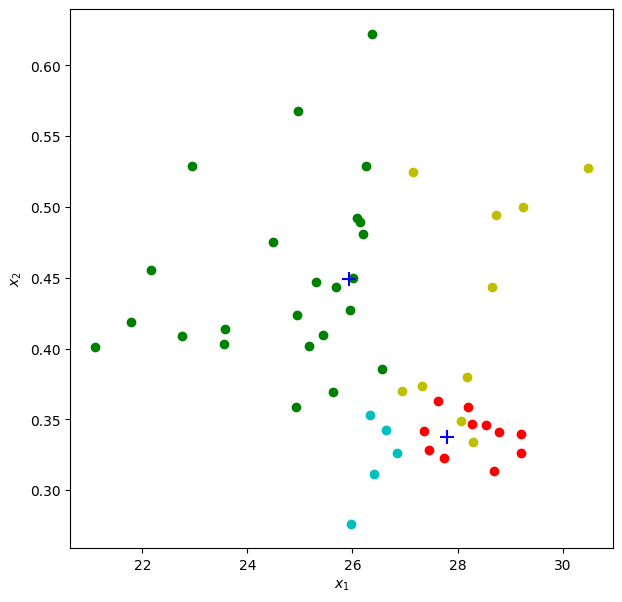

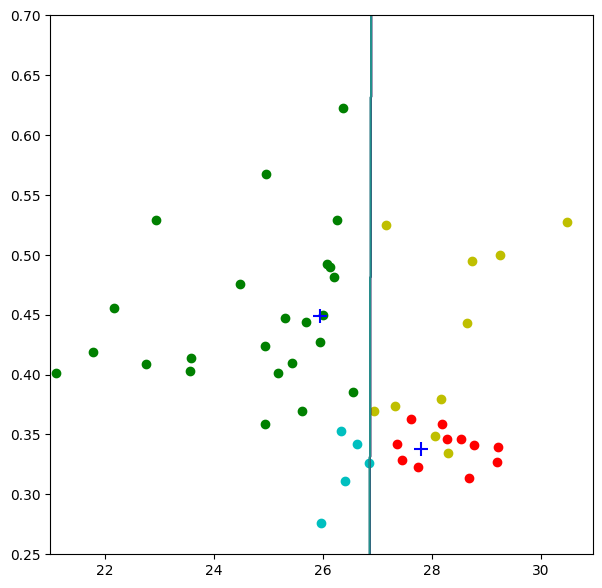

In [24]:
# ---------- YOUR CODE STARTS HERE -----------

# displaying test data
yp = y_test == 'pear'
ya = y_test == 'apple'
X1 = X_test[yp,:]
X2 = X_test[ya,:]

fig, ax = plt.subplots()
ax.scatter(X1[:,0], X1[:,1], c='r', label='pear')
ax.scatter(X2[:,0], X2[:,1], c='b', label='apple')
ax.set_xlabel('$x_1$ (hue)')
ax.set_ylabel('$x_2$ (eccentricity)')
ax.set_title('Test data')
ax.legend()

# displaying class centroids
y_pred = nc.predict(X_test)

tp = np.logical_and(y_test == 'pear', y_pred == 'pear')
tn = np.logical_and(y_test == 'apple', y_pred == 'apple')
fp = np.logical_and(y_test == 'apple', y_pred == 'pear')
fn = np.logical_and(y_test == 'pear', y_pred == 'apple')

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.scatter(nc.centroids_[:,0],nc.centroids_[:,1], c='b', marker='+', s=100)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# displaying decision boundary
x, y = np.meshgrid(np.linspace(21, 30, 1000),np.linspace(0.25, 0.7, 1000))
grid = np.vstack((x.flatten(), y.flatten())).T
db = nc.predict(grid).reshape(1000, 1000)
db = (db == 'pear').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.scatter(nc.centroids_[:,0],nc.centroids_[:,1], c='b', marker='+', s=100)
plt.contour(x, y, db, 1)

# ----------- YOUR CODE ENDS HERE ------------

## Classification using Mahalanobis distance

Notice that features (eccentricity and hue) are not measured in the same units. The drawback with Euclidean distance is that it gives equal weights to all dimensions. The clusters that we are trying to model are not spherical so the Euclidean distance does not give an accurate distance. We can model both clusters as multivariate Gaussian distributions with a mean $\mu$ and covariance matrix $\sum$. This implicitly represents the region as an ellipsoid centered at $\mu$ with the axes aligned with the eigenvectors of $\sum$.

The Mahalanobis distance provides an adequate distance in this case, weighting each dimension according to the observed variance and taking into account the covariance of different dimensions. The equation for the Mahalanobis distance is:

$$
d_M^i = \sqrt{(\mathbf{x}-\mathbf{\mu}_i)^\top \sum{}{}_{i}^{-1} (\mathbf{x}-\mathbf{\mu}_i)} \qquad \qquad (1).
$$

In this case, the inverse covariance matrix $\sum^{-1}$ is a 2 x 2 matrix as we have two features.

### Task 3 - Means and covariances (0.25 points)

Complete the following code cell to compute the **means** ($\mathbf{\mu}_1$ and $\mathbf{\mu}_2$) and **covariance matrices** ($\Sigma_1$ and $\Sigma_2$) for the training samples `X1` and `X2`.

**Instructions**
1. Use the function [`np.mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) to compute the centroids of `X1` and `X2`. Name them `mean1` and `mean2`.
2. Use the function [`np.cov`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) to compute the covariance matrices of `X1` and `X2`. Name them `cov1` and `cov2`. These should be 2 x 2 matrices (see the *rowvar* parameter).
3. Print the means and covariance matrices.

In [33]:
# ---------- YOUR CODE STARTS HERE -----------

# Compute means (mean1, mean2)
mean1 = np.mean(X1, axis=0)
mean2 = np.mean(X2, axis=0)

# Compute covariance matrices (cov1, cov2)
cov1 = np.cov(X1, rowvar=False)
cov2 = np.cov(X2, rowvar=False)

print(f"mean1 : {mean1}, mean2: {mean2}")
print(f"cov1 : {cov1}")
print(f"cov2: {cov2}")

# ----------- YOUR CODE ENDS HERE ------------

mean1 : [25.79617238  0.44417472], mean2: [27.70260156  0.33361795]
cov1 : [[4.79389321e+00 1.29144223e-02]
 [1.29144223e-02 4.52502693e-03]]
cov2: [[1.10738334e+00 7.47995396e-03]
 [7.47995396e-03 4.59713929e-04]]


In [ ]:
# LEAVE EMPTY

### Task 4 - Mahalanobis distances (0.75 points)

Complete the function `mahalanobisDistances` to compute the Mahalanobis distances between the test samples `X` and a class centroid `mean` using Equation 1. Use __[`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)__ to compute the inverse of the covariance matrix `cov`.

After completing the function, run the code cell. This will calculate the distances for both class centroids (`mean1` and `mean2`), classify the test samples, and compute the mean accuracy. Your code is likely correct if the mean accuracy is 0.92.

In [41]:
# INPUT
# X    : Feature vectors of the test samples (Mx2 matrix)
# mean : The mean feature (centroid) of the class (1x2 vector)
# cov  : Covariance matrix of the class (2x2 matrix)
#
# OUTPUT
# dists : Mahalanobis distances between the test samples 'X'
#         and the centroid 'mean' (1xM vector)
#
def mahalanobisDistances(X, mean, cov):

    # ---------- YOUR CODE STARTS HERE -----------
    inverse_cov = np.linalg.inv(cov)
    dists = np.sqrt(np.sum((X - mean) @ inverse_cov * (X - mean), axis=1))

    # ----------- YOUR CODE ENDS HERE ------------

    return dists

# Calculate the distances
D1 = mahalanobisDistances(X_test, mean1, cov1)
D2 = mahalanobisDistances(X_test, mean2, cov2)

# Produce class labels based on the distances
idx = D1 < D2
y_pred = np.array(D1.shape[0]*['apple'])
y_pred[idx == True] = 'pear'

# Compute mean accuracy
score = np.sum(y_test == y_pred) / y_test.shape[0]
print('Score = %f' %score)


Score = 0.920000


In [ ]:
# LEAVE EMPTY

# Aftermath

Please provide short answers to the following questions:

**1. How much time did you need to complete this exercise?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**2. Did you experience any issues or find anything particularly confusing?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`


# References

`List any references here (optional).`

# Submission

1. Go to `Kernel -> Restart & Clear Output` to remove all outputs.
2. Compress this notebook (`MV_A5.ipynb`) into `MV_A5.zip`.
3. Submit the **zip** file on Moodle.

**Deadline: 16.02.2025**